In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
sns.set(style = 'whitegrid')
import warnings
warnings.filterwarnings('ignore')

In [2]:
%ls

1. Data Visualization Basics.ipynb
2. Controlling Asthetics.ipynb
3. Color Palettes.ipynb
4. LM Plot & Reg Plot.ipynb
5. Scatter Plot and Joint Plot.ipynb
Maryland_Counties_Socioeconomic_Characteristics.csv
Workforce___Economic_Development_2010.csv
data-police-shootings/
human-development/


In [20]:
# Loading Dataset
df = pd.read_csv("human-development/human_development.csv")

In [21]:
print(df.columns)
df.head()

Index(['HDI Rank', 'Country', 'Human Development Index (HDI)',
       'Life Expectancy at Birth', 'Expected Years of Education',
       'Mean Years of Education', 'Gross National Income (GNI) per Capita',
       'GNI per Capita Rank Minus HDI Rank'],
      dtype='object')


,HDI Rank,Country,Human Development Index (HDI),Life Expectancy at Birth,Expected Years of Education,Mean Years of Education,Gross National Income (GNI) per Capita,GNI per Capita Rank Minus HDI Rank
0,1.0,Norway,0.944,81.6,17.5,12.6,"64,992",5.0
1,2.0,Australia,0.935,82.4,20.2,13.0,"42,261",17.0
2,3.0,Switzerland,0.930,83.0,15.8,12.8,"56,431",6.0
3,4.0,Denmark,0.923,80.2,18.7,12.7,"44,025",11.0
4,5.0,Netherlands,0.922,81.6,17.9,11.9,"45,435",9.0


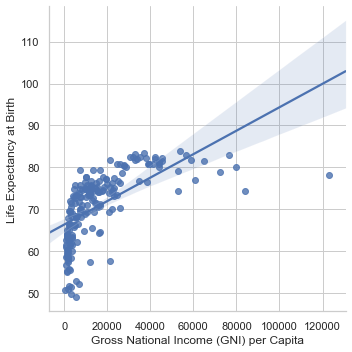

In [31]:
sns.lmplot(x = 'Gross National Income (GNI) per Capita', y = 'Life Expectancy at Birth', data = df)

In [23]:
df['Gross National Income (GNI) per Capita'] = df['Gross National Income (GNI) per Capita'].apply(lambda x : x.replace(",", ""))
df['Gross National Income (GNI) per Capita'] = df['Gross National Income (GNI) per Capita'].astype(int, copy = True)

In [32]:
tableau_20 = [(31,119,180), (174,199,232), (255,127,14), (255,187,120), (44,160,44), (140,86,75), (196,156,148), (227,119,194), (247,182,210), (127,127,127), (152,223,138), (214,39,40), (255,152,150), (148,103,189), (197,176,213), (199,199,199), (188,189,34), (219,219,141), (23,190,207), (158,218,229) ]

for i in range(len(tableau_20)):
    r, g, b = tableau_20[i]
    tableau_20[i] = (r/255., g/255., b/255.)

In [33]:
tableau_20[4]

(0.17254901960784313, 0.6274509803921569, 0.17254901960784313)

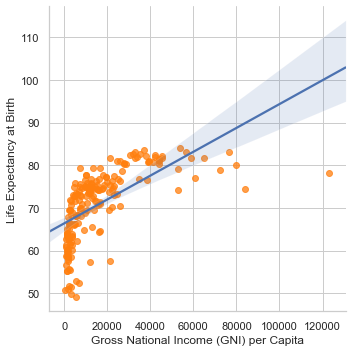

In [34]:
sns.lmplot(x = 'Gross National Income (GNI) per Capita', y = 'Life Expectancy at Birth', data = df, scatter_kws = {'color' : tableau_20[2], 'alpha' : 0.75})

With increase in GNI,  Life Expectancy Rate Increases

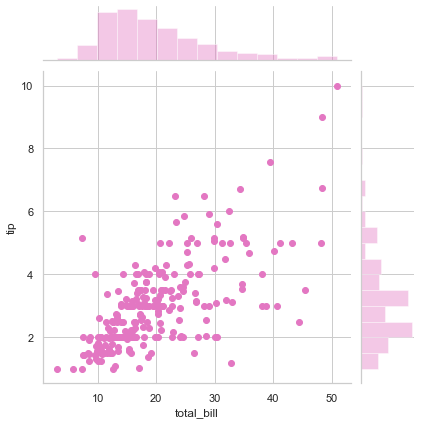

In [35]:
tips = sns.load_dataset("tips")

sns.jointplot(x = 'total_bill', y = 'tip', data = tips, color = tableau_20[7])

These spines represent <b>Gaussian distribution</b> of a <b>sample space</b>, which in our case comprises of Total bill and associated tips from our dataset. Let us fit the <b>Density curve</b> on top of it, that we had observed in the introductory lectures as well and while we do that, simultaneously we shall also switch from scattered distribution to something different

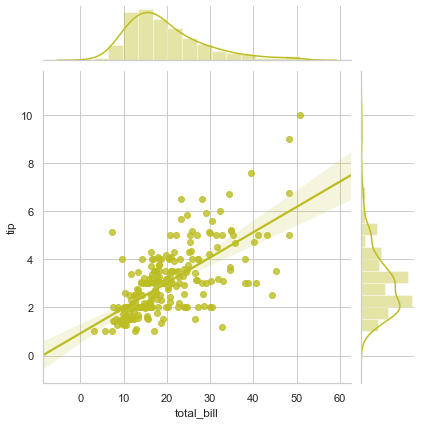

In [36]:
sns.jointplot("total_bill", "tip", data = tips, kind = "reg", color = tableau_20[16])

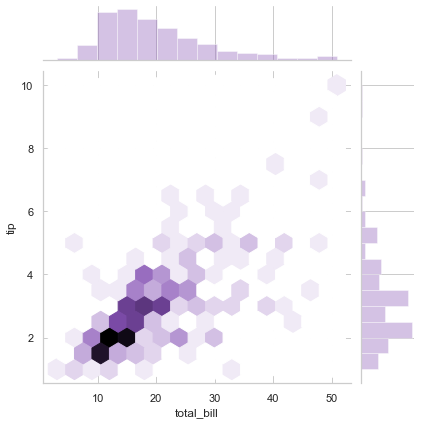

In [38]:
sns.jointplot("total_bill", "tip", data = tips, kind = "hex", color = tableau_20[13])
# This is known as hexagonal bins

The area below the <b>density curve</b> on the histogram is what statistically helps in calculating the PDF, i.e. <b>Probability Density function</b> and the highest peak of the curve is the <b>mean of distribution</b>.

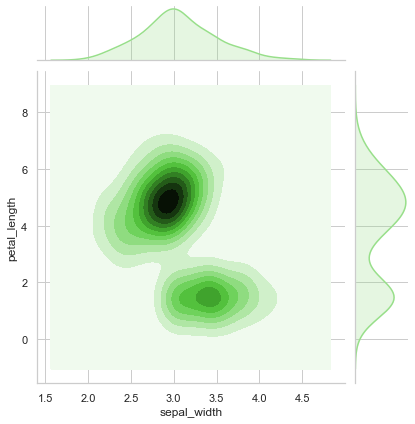

In [40]:
iris = sns.load_dataset("iris")

sns.jointplot("sepal_width", "petal_length", data = iris, kind = 'kde', space = 0.2, color = tableau_20[10])

Plotting two distributions in a JointPlot

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


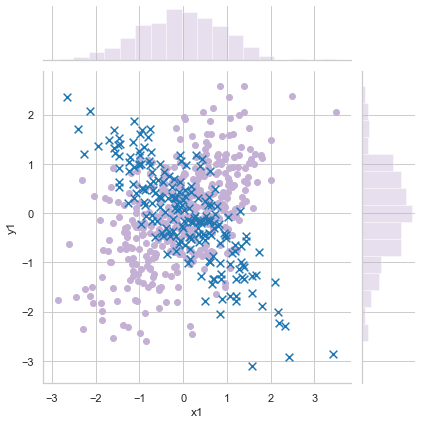

In [52]:
np.random.seed(seed = 10)
data1 = np.random.multivariate_normal([0, 0], [[1, .5], [.5, 1]], size = 400)
data2 = np.random.multivariate_normal([0, 0], [[1, -.8], [-.8, 1]], size = 200)

df1 = pd.DataFrame(data1, columns={'x1', 'y1'})
df2 = pd.DataFrame(data2, columns={'x2', 'y2'})

graph = sns.jointplot(x = df1.x1, y = df1.y1, color=tableau_20[14])

graph.x = df2.x2
graph.y = df2.y2
graph.plot_joint(plt.scatter, marker = 'x', c = tableau_20[0], s=60)

Note: Joint plot is a figure-level function so it can’t coexist in a figure with other plots. But we do have our kde plot function which can draw a 2-d KDE onto specific Axes.

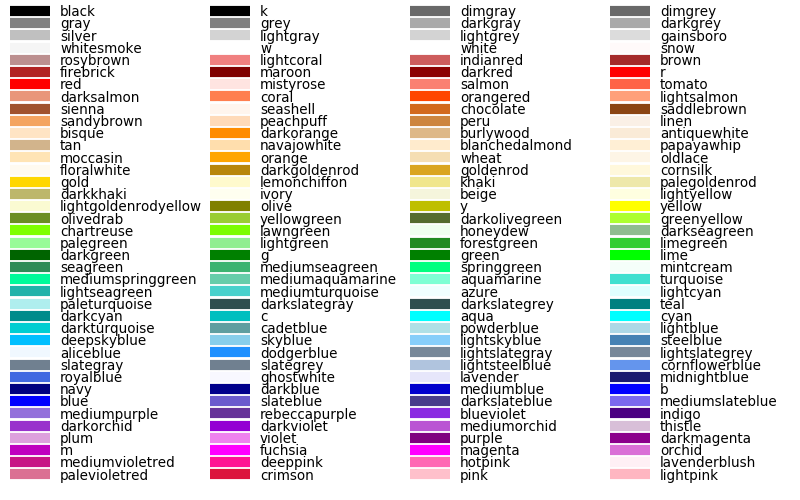

In [47]:
# Available seavorna and Matplotlib color choices
from IPython.display import Image
Image(filename="100_Color_names_python.png", width = 2000, height = 2000, retina = False)